In [54]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import neurokit2 as nk
from customLib.preprocess import *
from customLib.peak_detection import detect_nk

In [30]:
PATH = "E:\\ml-data\\masters-thesis\\RSA\\Zenodo\\human"
zenodo_sampling_rate = 1000
ecg_sampling_rate = 250
resp_sampling_rate = 50

In [31]:
files = os.listdir(PATH)

In [50]:
data = np.loadtxt(PATH + "\\" + files[3])

C:\Users\patry\AppData\Local\Temp\ipykernel_7016\1232481279.py:41: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


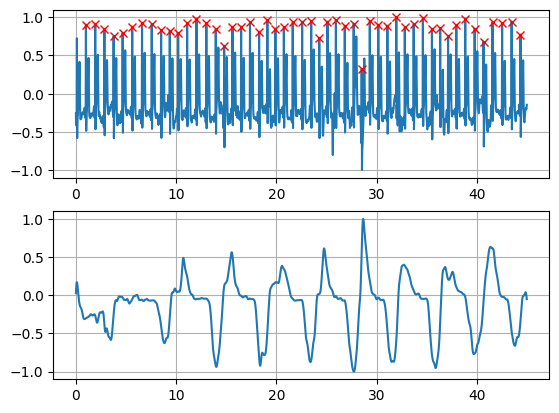

In [66]:
start_s = 60
stop_s = start_s + 45

recording_length = (stop_s - start_s) * zenodo_sampling_rate

start = start_s * zenodo_sampling_rate

if stop_s == -1:
    stop = len(data[:,0])
else:
    stop = start + recording_length

ECG = data[start:stop, 0]
RESP = data[start:stop, 1]

ECG = myConv1D(signal=ECG, kernel_length=10, padding="same")
ECG = resample_signal(ECG, num_samples=int(len(ECG) * ecg_sampling_rate / zenodo_sampling_rate))
ECG = nk.ecg_clean(ecg_signal=ECG, sampling_rate=ecg_sampling_rate)
ECG = norm_min_max(ECG, -1, 1)

r_peaks = detect_nk(ECG, fs=ecg_sampling_rate)

RESP = resample_signal(RESP, num_samples=int(len(RESP) * resp_sampling_rate / zenodo_sampling_rate))
RESP = nk.rsp.rsp_clean(rsp_signal=RESP, sampling_rate=resp_sampling_rate)
RESP = norm_min_max(RESP, -1, 1)

t_ecg = [x * 1/ecg_sampling_rate for x in range(len(ECG))]
t_resp = [x * 1/resp_sampling_rate for x in range(len(RESP))]

fig, axs = plt.subplots(nrows=2)

ax = axs[0]
ax.plot(t_ecg, ECG)
ax.plot(r_peaks * 1 / ecg_sampling_rate, ECG[r_peaks], 'rx')
ax.grid()

ax = axs[1]
ax.plot(t_resp, RESP)
ax.grid()

fig.show()


In [64]:
len(RESP) / resp_sampling_rate

11.24

In [65]:
len(ECG) / ecg_sampling_rate 

45.0